<a href="https://colab.research.google.com/github/broskunta/PyTorch-Linear-Regression/blob/main/_Linear_Regression_1D_Training_Two_Parameter_Mini_Batch_Gradient_Descent_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression 1D: Training Two Parameter Mini-Batch Gradient Descent

Preparation

In [1]:
#import the required libraries

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# The class for plotting the diagrams

class plot_error_surfaces(object):

    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

     # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Data Space Iteration: '+ str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

Generate Data

In [3]:
# IMPORT LIBRRAY
import torch
torch.manual_seed(1)

In [5]:
#generate the data
X = torch.arange(-3,3,0.1).view(-1,1)
f = 1 * X - 1

Y = f + 0.1 * torch.randn(X.size())

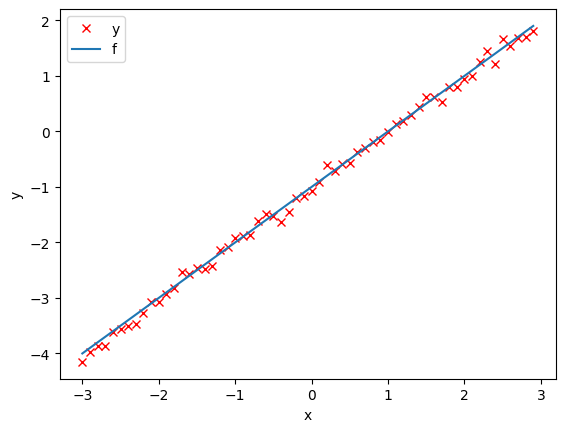

In [6]:
# plot the results
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Create Model and Cost Function

In [7]:
# define the prediction function
def forward(x):
    return w * x + b

In [8]:
# define the cost function
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

<Figure size 640x480 with 0 Axes>

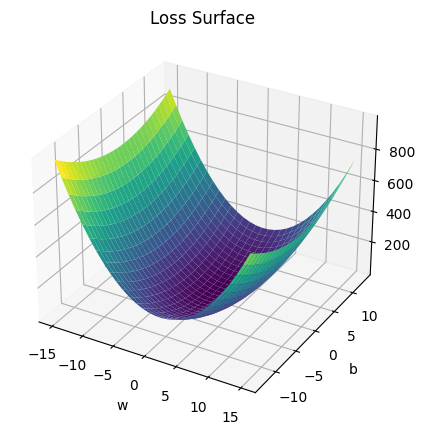

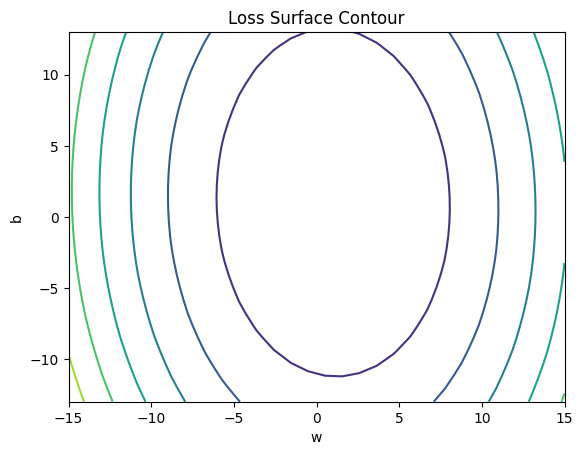

In [9]:
# create a plot_error_Surface
get_surface = plot_error_surfaces(15,13, X,Y, 30)

Train the Model: Batch Gradient Descent (BGD)

In [13]:
# create the variables

w = torch.tensor(-15.0, requires_grad= True)
b = torch.tensor(-10.0, requires_grad= True)
lr = 0.1
LOSS_BDG = []

In [14]:
# define the training model

def training_model_BDG(epochs):
    #loops
    for epochs in range(epochs):
        #make a prediction
        Yhat = forward(X)
        #check the loss
        loss = criterion(Yhat, Y)
        #append the loss
        LOSS_BDG.append(loss)
        #plot the surface
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
        # backward pass
        loss.backward()
        #update variables
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        #zero the gradients
        w.grad.data.zero_()
        b.grad.data.zero_()

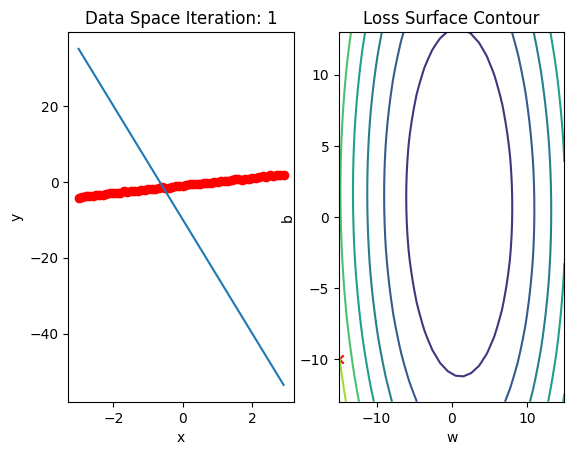

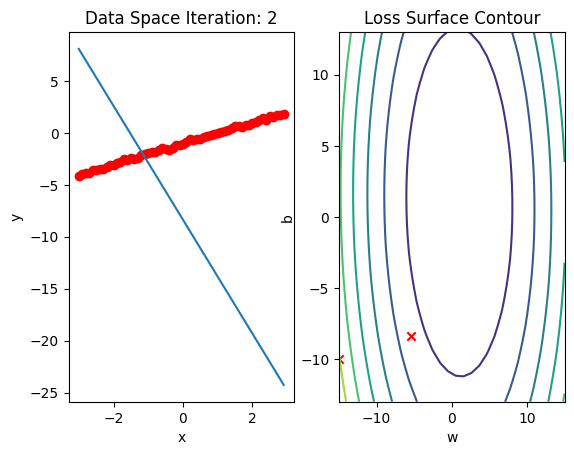

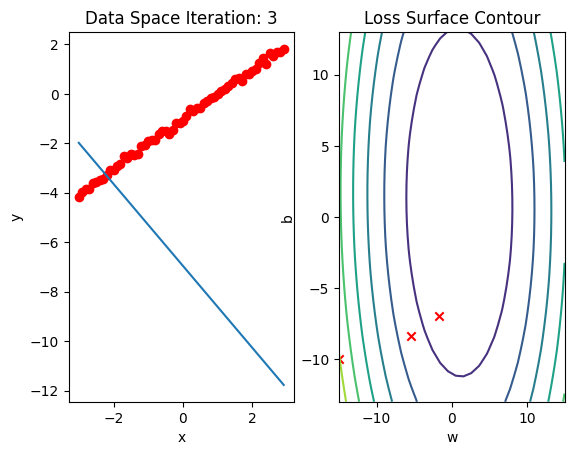

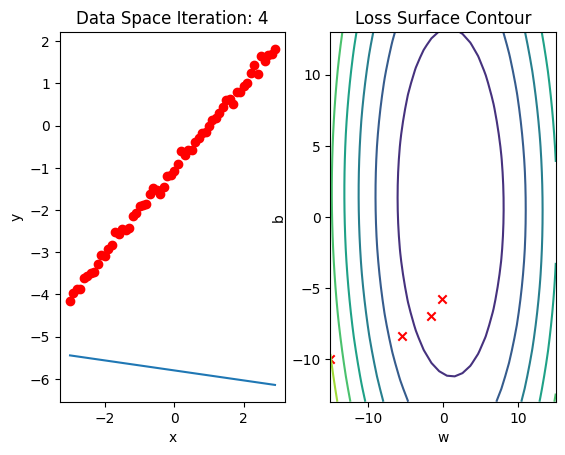

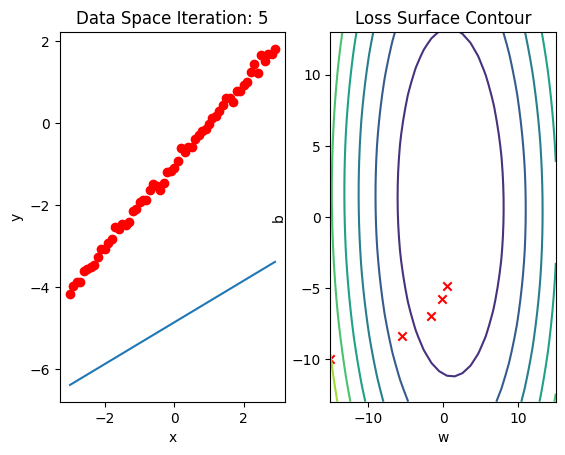

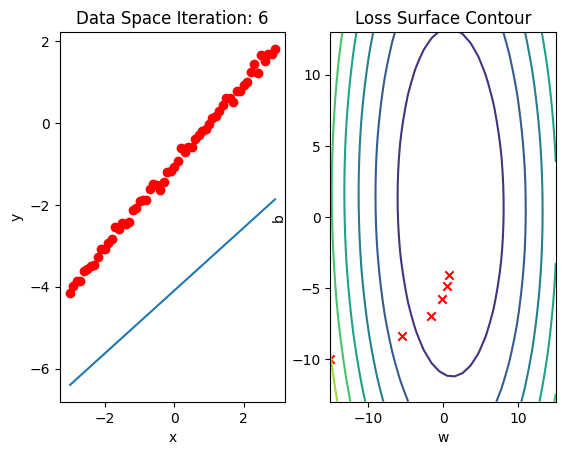

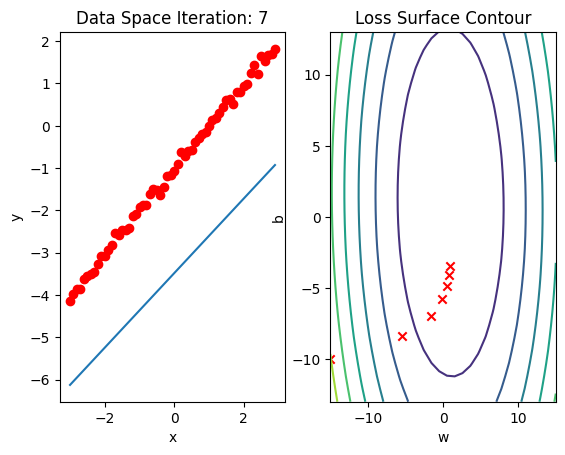

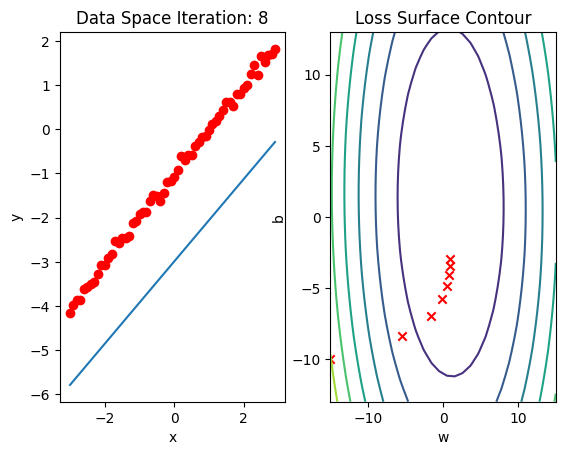

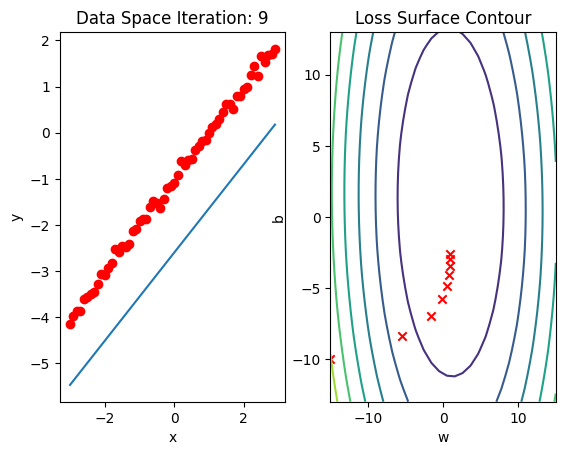

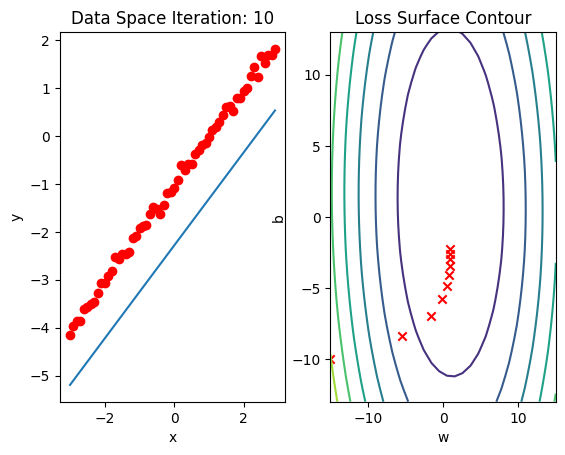

In [15]:
# run the model for 10 iterations
training_model_BDG(10)

Stochastic Gradient Descent (SGD) with Dataset DataLoader

In [16]:
ger_surface = plot_error_surfaces(15,13,X,Y,30, go = False)

In [17]:
# import dataset and dataloader libraries
from torch.utils.data import Dataset, DataLoader

In [18]:
# Create class Data

class Data(Dataset):

    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * X - 1
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get length
    def __len__(self):
        return self.len

In [19]:
# create data object and dataloader object

dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size=1)

In [20]:
# define the parameters

w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
lr = 0.1
LOSS_SGD = []


In [27]:
# define training model for SGD

def train_model_SGD(epochs):
    for epoch in range(epochs):
        #make prediction
        Yhat = forward(X)
        #plot surface plots
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        #loss
        LOSS_SGD.append(criterion(forward(X), Y).tolist())

        #dataloader loop
        for x,y in trainloader:
            #make prediction
            yhat = forward(x)
            #loss
            loss = criterion(yhat, y)
            #plot surface graphs
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            #backpass
            loss.backward()
            #update params
            w.data = w.data - lr *w.grad.data
            b.data = b.data - lr *b.grad.data
            #zero the grad
            w.grad.data.zero_()
            b.grad.data.zero_()
        get_surface.plot_ps()


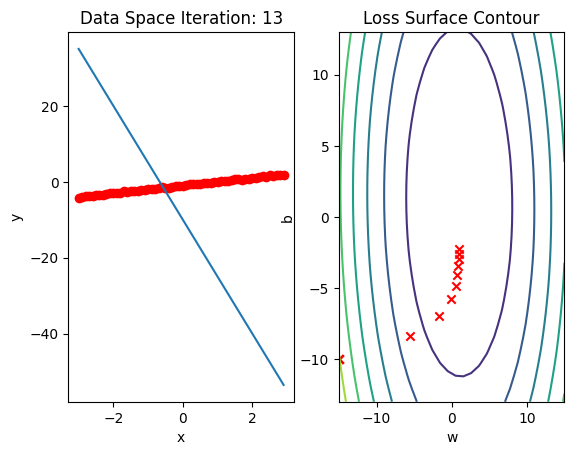

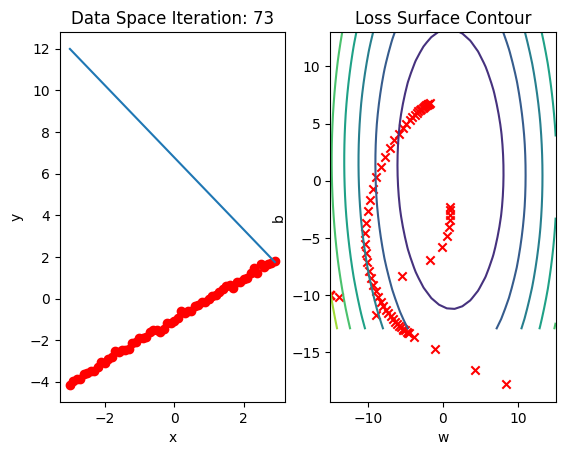

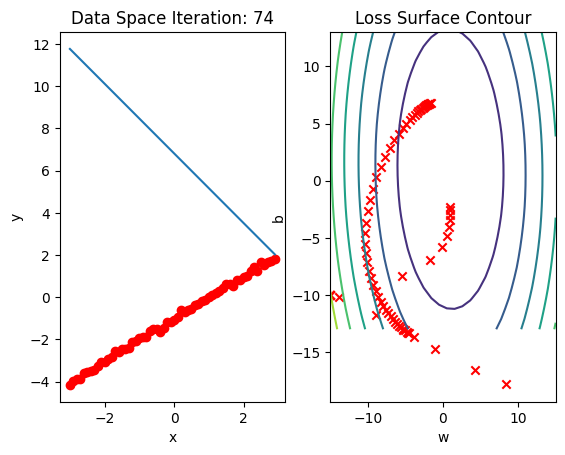

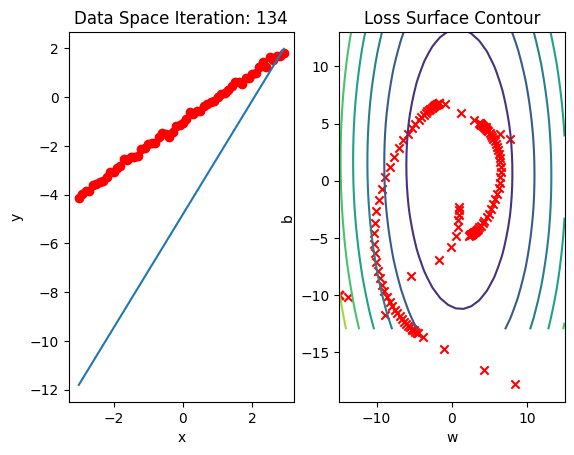

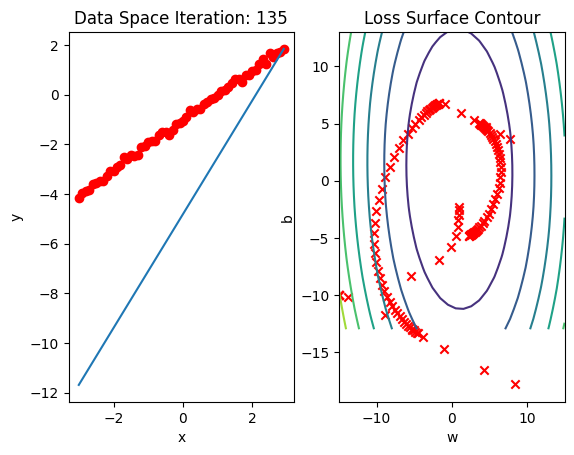

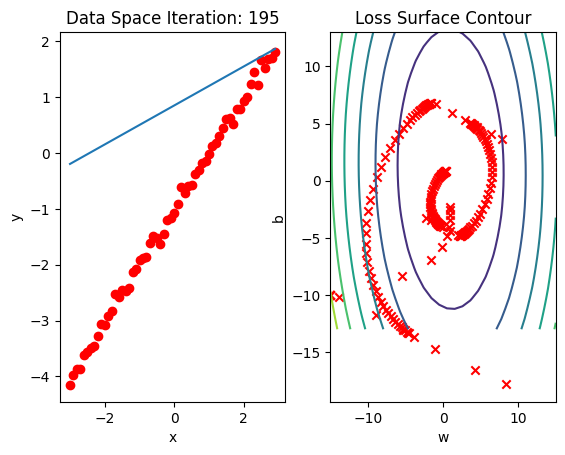

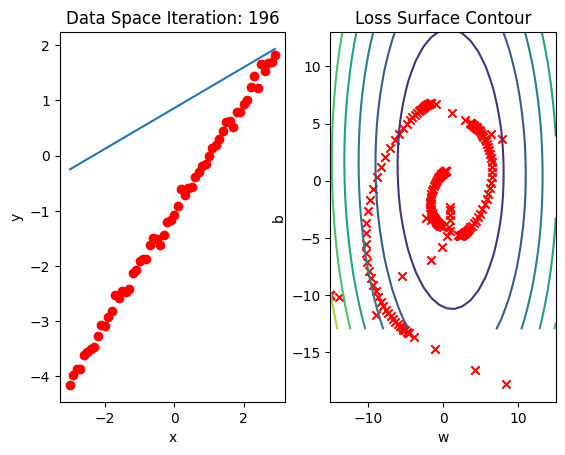

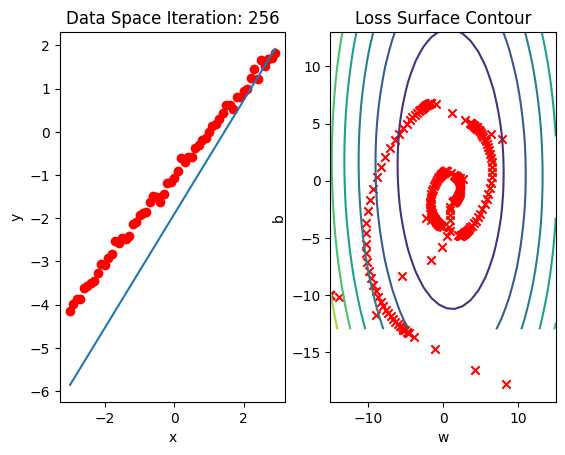

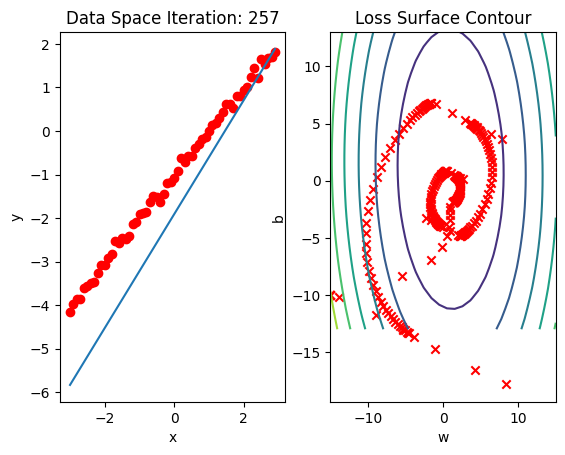

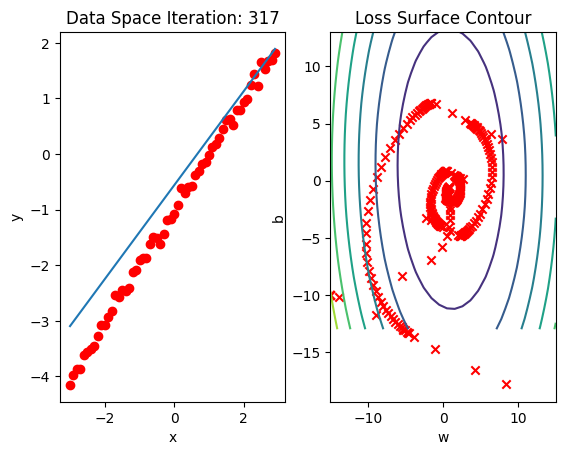

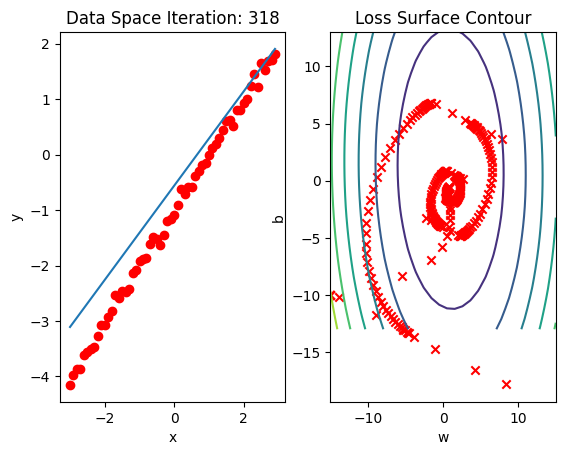

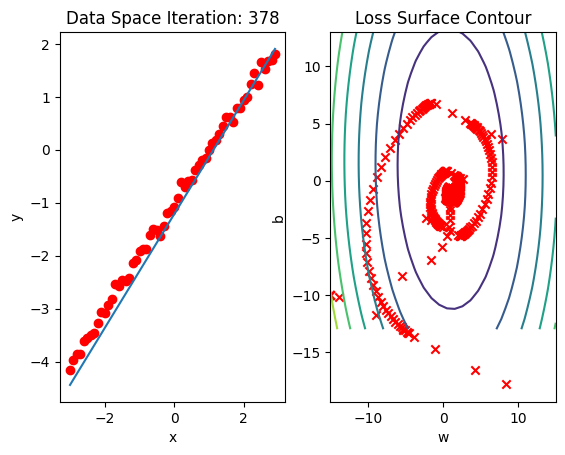

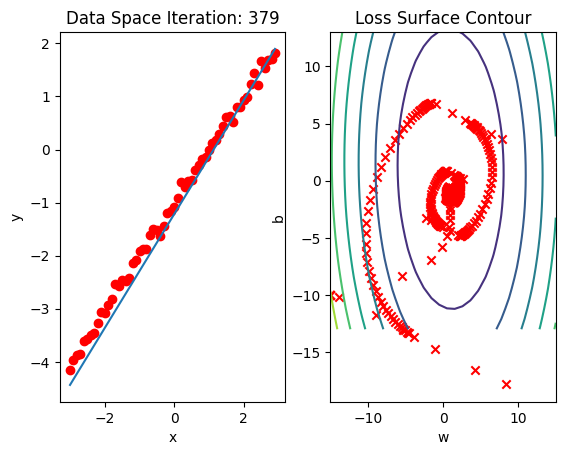

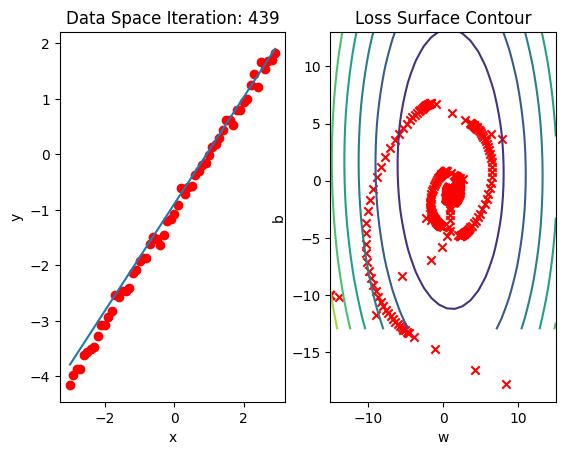

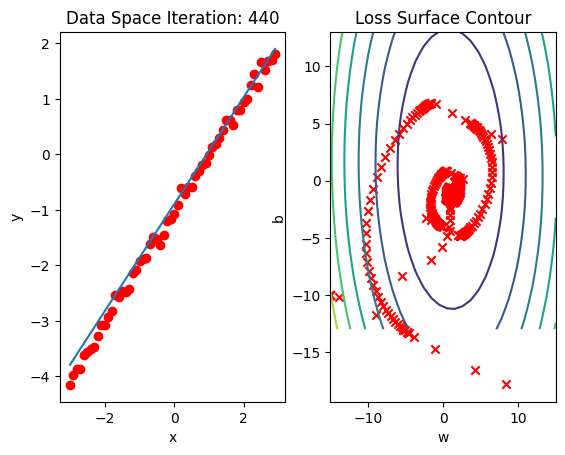

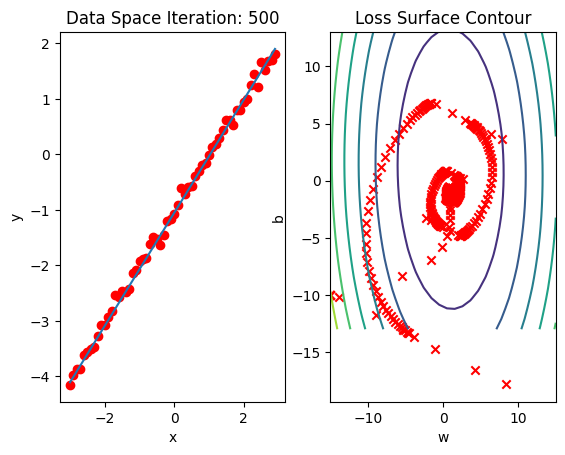

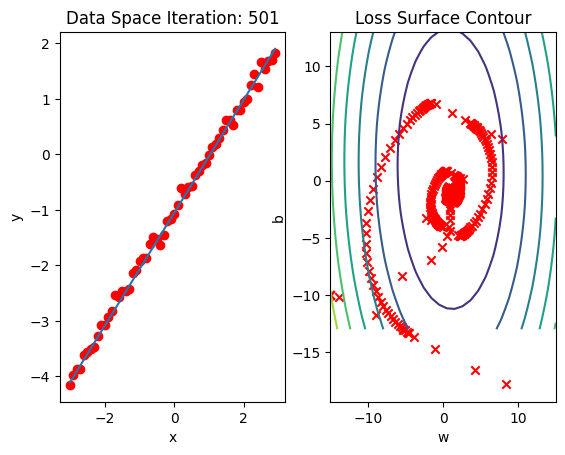

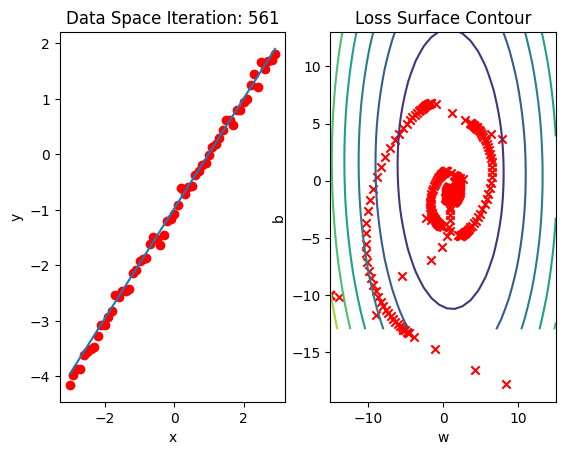

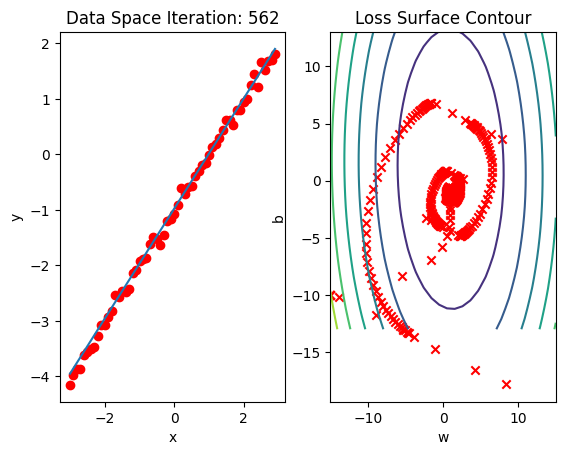

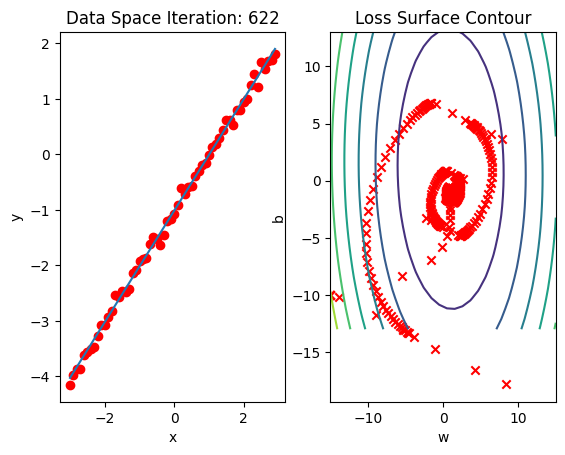

In [28]:
#run the model for 10 iterations
train_model_SGD(10)

Mini Batch Gradient Descent: Batch Size Equals 5.

In [29]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go= False)

In [30]:
# create dataloader and data object

dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size= 5)

In [31]:
# define the parameters
w = torch.tensor(-15.0, requires_grad= True)
b = torch.tensor(-10.0, requires_grad= True)
lr = 0.1
LOSS_MINIS = []

In [32]:
# define the train function stochastic method

def train_model_MINIS(epochs):
    for epochs in range(epochs):
        #make preds
        Yhat = forward(X)
        #surface plots
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        #append loss
        LOSS_MINIS.append(criterion(forward(X), Y).tolist())
        #innner loop
        for x,y in trainloader:
            #make pred
            yhat = forward(x)
            #calculate loss
            loss = criterion(yhat, y)
            #plot
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            #back pass
            loss.backward()
            #update parameter
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            #zero the grad
            w.grad.data.zero_()
            b.grad.data.zero_()


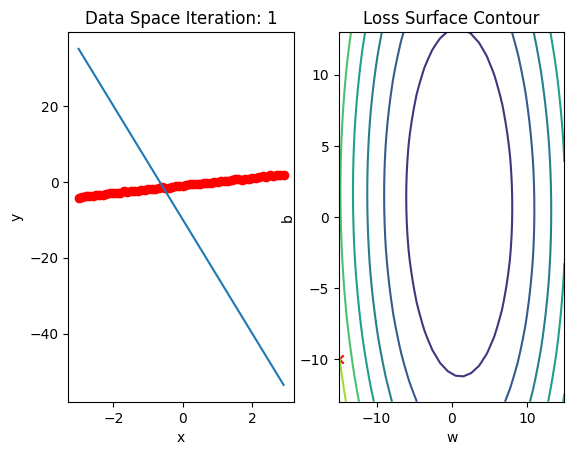

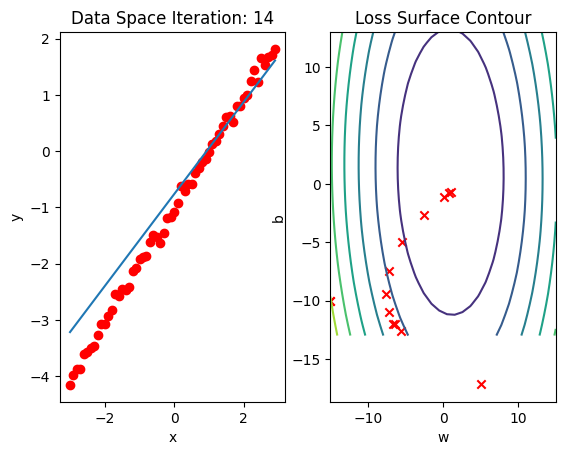

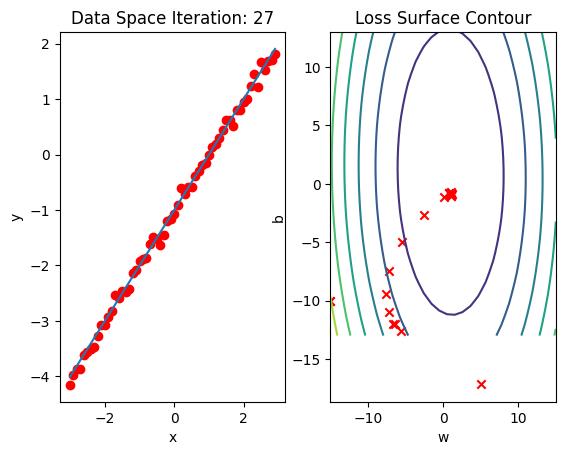

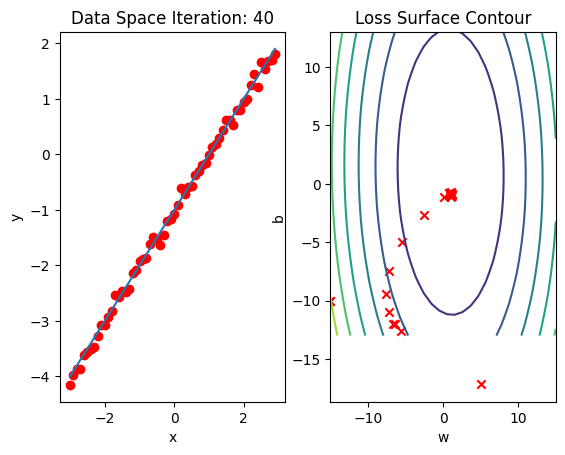

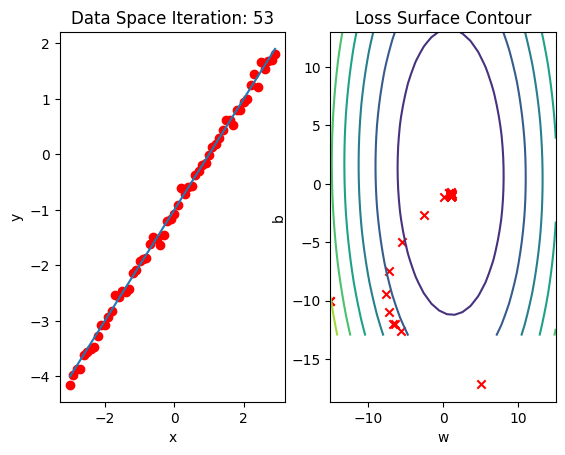

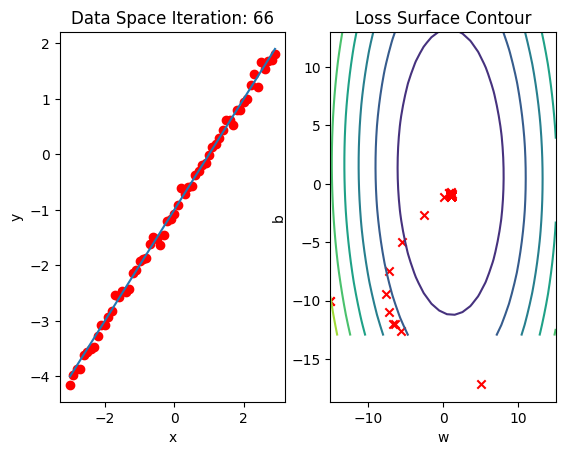

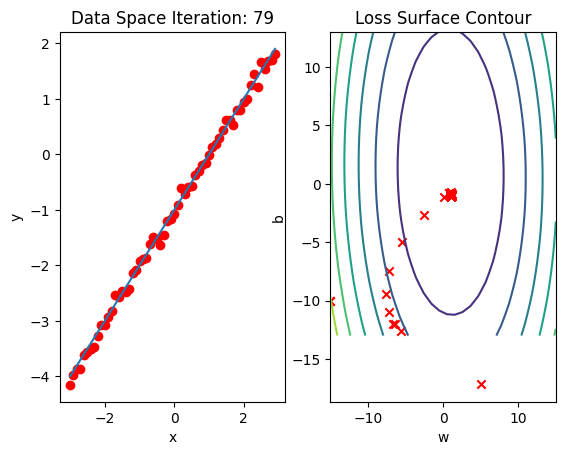

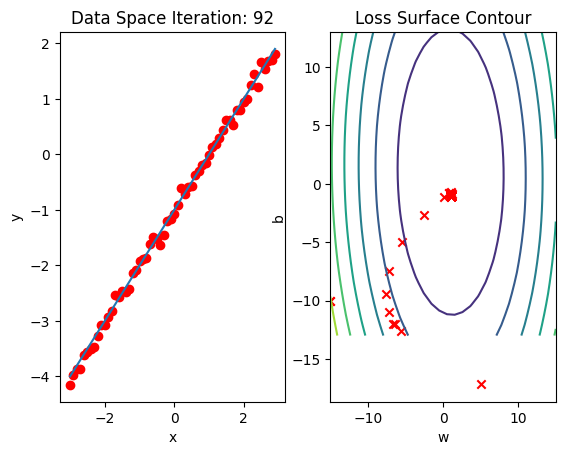

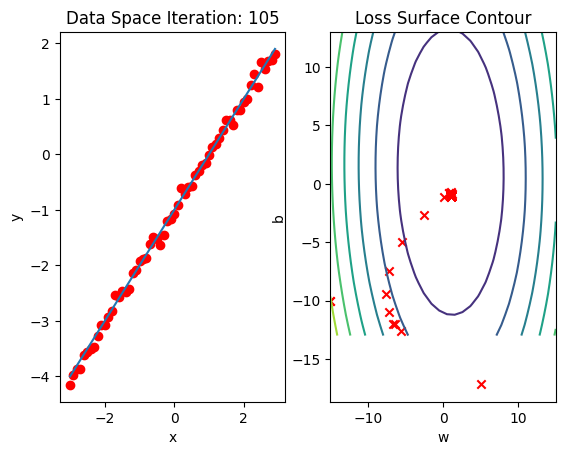

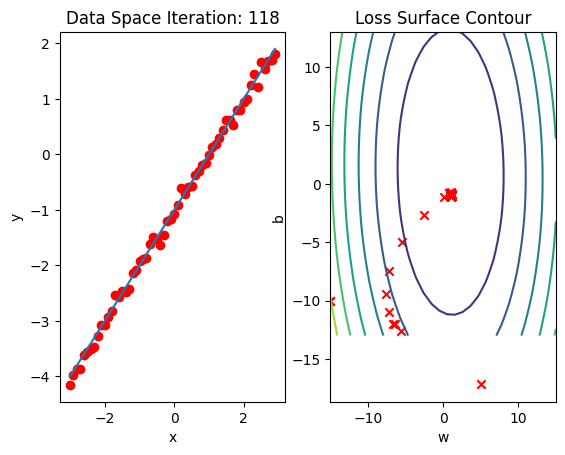

In [33]:
# train the model for 10 iterations
train_model_MINIS(10)

In [34]:
print(LOSS_MINIS)

[835.276123046875, 0.18780595064163208, 0.008273560553789139, 0.00833750981837511, 0.008338185027241707, 0.008338185027241707, 0.008338185027241707, 0.008338185027241707, 0.008338185027241707, 0.008338185027241707]


In [35]:
print(len(LOSS_MINIS))

10


## Mini Batch Gradient Descent: Batch Size Equals 10

In [36]:
# createsurface for the plot
get_surface = plot_error_surfaces(15,13,X,Y,30, go=False)

In [37]:
#create the data and dataloader objects
dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size= 10)

In [38]:

#define the variables
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
lr= 0.1
LOSS_MINI10 = []

In [42]:
#define training function

def train_model_MINI10(epochs):
    for epoch in range(epochs):
        #prediction
        Yhat = forward(X)
        #Plot surface
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI10.append(criterion(forward(X), Y).tolist())
        #inner loop
        for x, y in trainloader:
            #make pred
            yhat = forward(x)
            #loss
            loss = criterion(yhat, y)
            #plot surface
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            #back pass
            loss.backward()
            #update parameters
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            #zero the grad
            w.grad.data.zero_()
            b.grad.data.zero_()

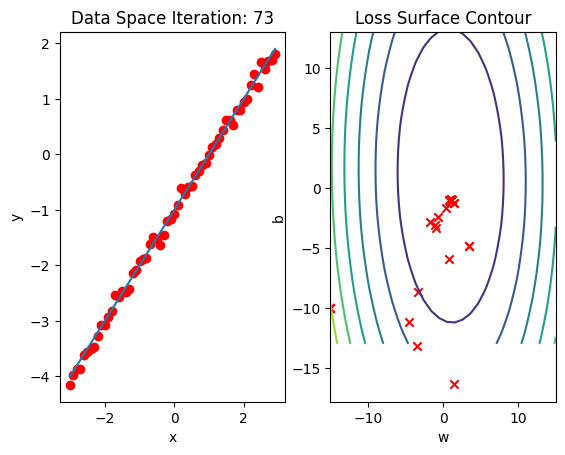

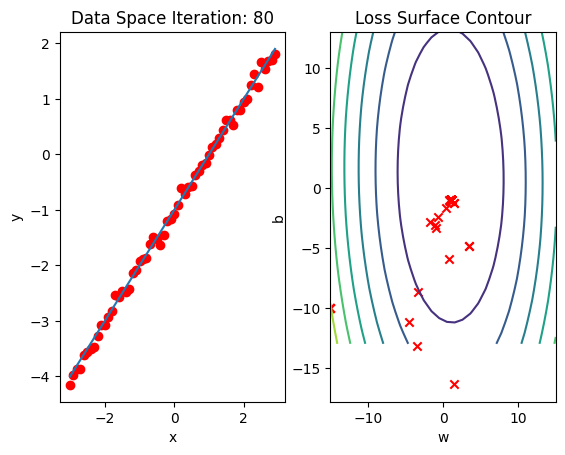

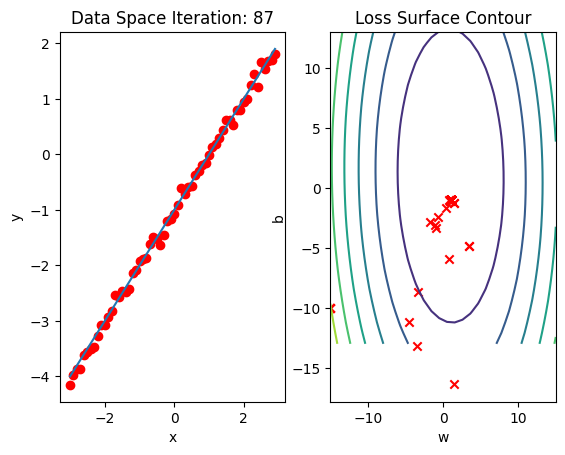

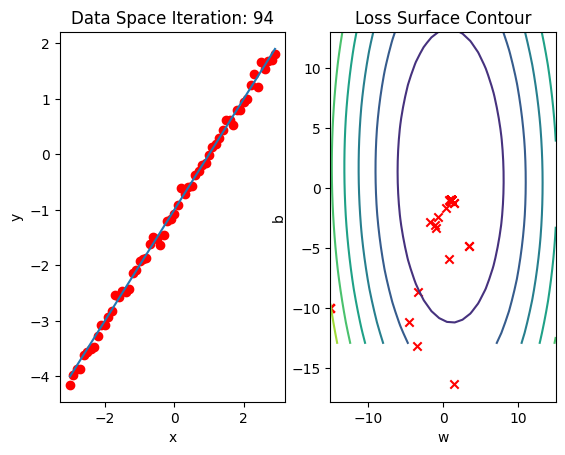

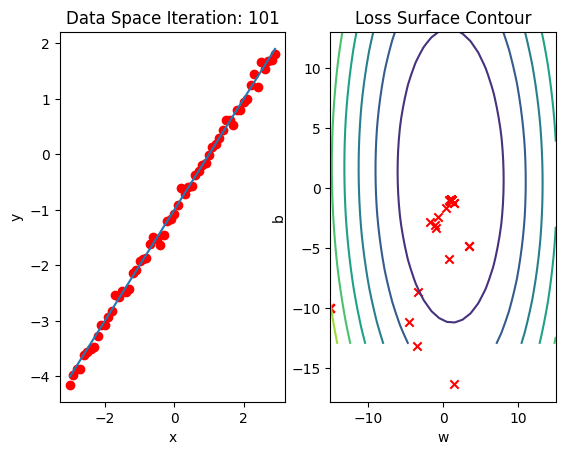

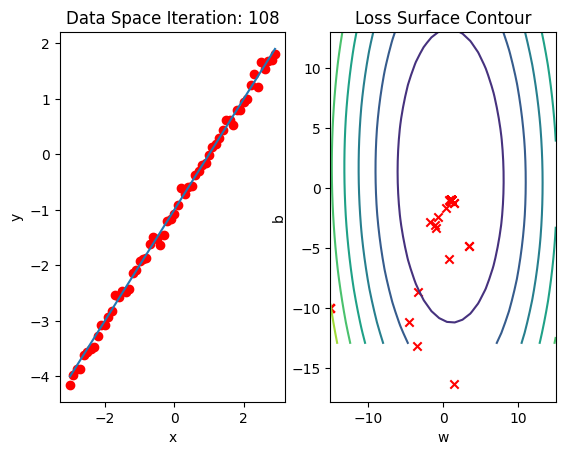

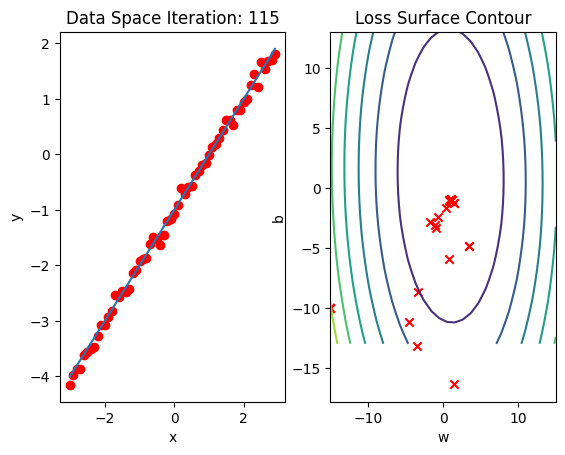

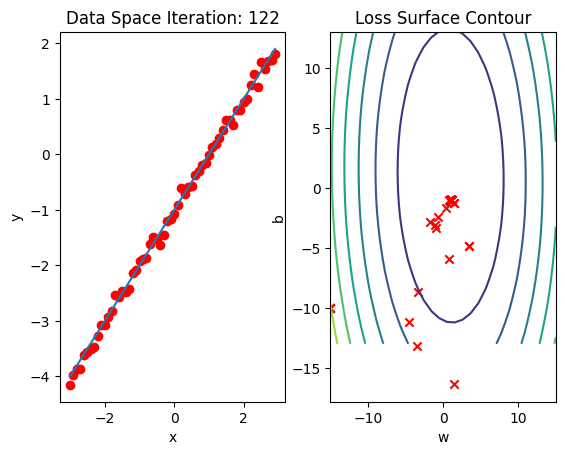

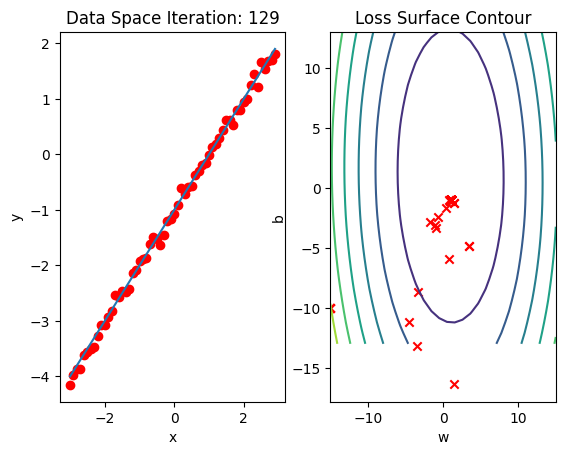

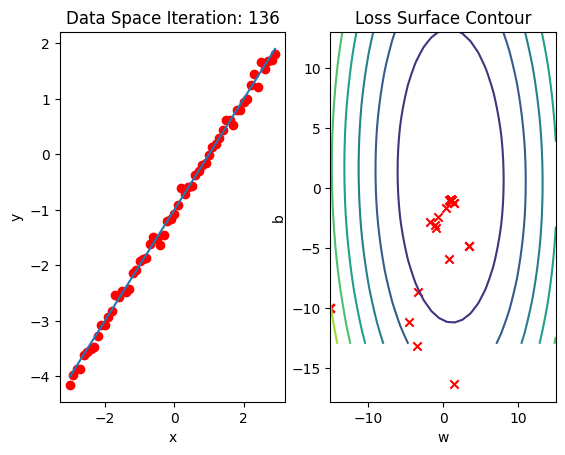

The loss is: 0.008338192477822304


In [44]:
#train the model for 10 iterations and print out the loss
train_model_MINI10(10)
print("The loss is:",LOSS_MINI10[-1])

## Plot the Loss for Each Epoch

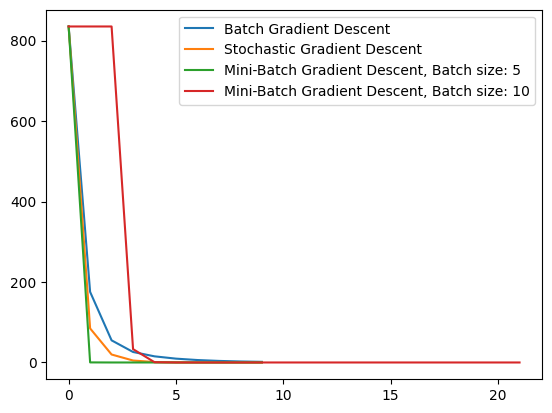

In [54]:
# Plot out the LOSS for each method
plt.plot(LOSS_BDG,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.plot(LOSS_MINIS,label = "Mini-Batch Gradient Descent, Batch size: 5")
plt.plot(LOSS_MINI10,label = "Mini-Batch Gradient Descent, Batch size: 10")
plt.legend()
plt.show()